In [2]:
# General import to be needed
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas

# import yfinance
import yfinance as yf


# Import warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Get SPY Data for last 1172 days
data = yf.download("SPY", start="2017-01-20", end="2021-03-03")
# Put into Pandas DataFrame
spy = pd.DataFrame(data)
spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-20,226.699997,227.309998,225.970001,226.740005,209.600113,129168600
2017-01-23,226.740005,226.809998,225.270004,226.149994,209.054703,75061600
2017-01-24,226.399994,228.080002,226.270004,227.600006,210.395096,95555300
2017-01-25,228.699997,229.570007,228.509995,229.570007,212.216156,84437700
2017-01-26,229.399994,229.710007,229.009995,229.330002,211.994339,59970700


In [4]:
# Clean Data and Drop non-essential columns
spy_data= spy.drop(columns=["High", "Low", "Open", "Volume", "Close"])
spy_data.columns = ["SPY Close"]
spy_data.head()

,SPY Close
Date,
2017-01-20,209.600113
2017-01-23,209.054703
2017-01-24,210.395096
2017-01-25,212.216156
2017-01-26,211.994339


In [5]:
# Calculate the portfolio daily returns
spy_data["Daily Returns"] = spy_data["SPY Close"].pct_change()


# Calculate the Cumulative returns
spy_data["Cumulative Returns"]= (1+ spy_data["Daily Returns"]).cumprod()-1

# Validate Data
spy_data.head()

,SPY Close,Daily Returns,Cumulative Returns
Date,,,
2017-01-20,209.600113,NaN,NaN
2017-01-23,209.054703,-0.002602,-0.002602
2017-01-24,210.395096,0.006412,0.003793
2017-01-25,212.216156,0.008655,0.012481
2017-01-26,211.994339,-0.001045,0.011423


# Prepare Dataframe to Determine Benchmarks

In [24]:
# Prepare DataFrame for metrics
metrics = [
    'Annual Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio']

columns = ['Backtest']

# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest` (just like PyFolio)
spy_evaluation_df = pd.DataFrame(index=metrics, columns=columns)


# Annualized Returns
spy_evaluation_df.loc['Annual Return'] = (
    spy_data['Daily Returns'].mean() * 252
)

# Calculate cumulative return
spy_evaluation_df.loc["Cumulative Returns"] =  (spy_data['Cumulative Returns'])

# Calculate annual volatility
spy_evaluation_df.loc['Annual Volatility'] = (
    spy_data['Daily Returns'].std() * np.sqrt(252)
)

# Calculate Sharpe Ratio 
spy_evaluation_df.loc['Sharpe Ratio'] = (
    spy_data['Daily Returns'].mean() * 252) / (
    spy_data['Daily Returns'].std() * np.sqrt(252)
)

# Calculate cumulative return
spy_evaluation_df.loc['Cumulative Returns'] = spy_data['Cumulative Returns'][-1]

# Calculate Downside Return
sortino_ratio_df = spy_data[['Daily Returns']]
sortino_ratio_df.loc[:,'Downside Returns'] = 0
sortino_ratio_df.head()

target = 0
mask = sortino_ratio_df['Daily Returns'] < target
sortino_ratio_df.loc[mask, 'Downside Returns'] = sortino_ratio_df['Daily Returns']**2

# Calculate Sortino Ratio
down_stdev = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)
expected_return = sortino_ratio_df['Daily Returns'].mean() * 252
sortino_ratio = expected_return/down_stdev

spy_evaluation_df.loc['Sortino Ratio'] = sortino_ratio

spy_evaluation_df

,Backtest
Annual Return,0.168618
Cumulative Returns,0.838158
Annual Volatility,0.2004
Sharpe Ratio,0.841409
Sortino Ratio,1.15395


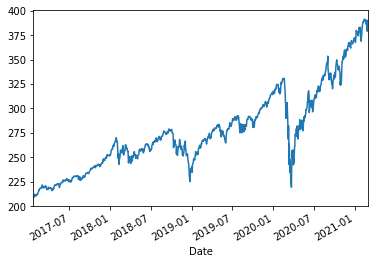

In [25]:
# Create Simple Plot of SPY Closing Prices
spy_data['SPY Close'].plot()

In [26]:
# HVPLOT SPY Close Data
spy_data.hvplot.line(x='Date', y='SPY Close', line_color="green")

:Curve   [Date]   (SPY Close)

In [43]:
#Get VIX Data for last 1172 days
vix = yf.download("^VIX", start="2017-01-20", end="2020-04-06")
vix.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-20,12.58,12.59,11.53,11.54,11.54,0
2017-01-23,12.30,12.62,11.59,11.77,11.77,0
2017-01-24,11.82,11.89,11.04,11.07,11.07,0
2017-01-25,10.79,11.05,10.51,10.81,10.81,0
2017-01-26,10.61,11.01,10.60,10.63,10.63,0


# Generate Additional Value For Neural Network

In [44]:
# Put VIX Into DataFrame
vix2 = pd.DataFrame(vix)
# Clean Data and Drop non-essential columns
vix_data= vix2.drop(columns=["High", "Low", "Open", "Volume", "Close"])
vix_data.columns = ["VIX Close"]
vix_data.head()
vix_data.describe()

,VIX Close
count,807.000000
mean,15.844833
std,8.838167
min,9.140000
25%,11.630000
50%,13.470000
75%,16.590000
max,82.690002


In [45]:
# HVPLOT VIX Index Close Data
vix_data.hvplot.line(x='Date', y='VIX Close', line_color="blue")

:Curve   [Date]   (VIX Close)

In [46]:
# Combine SPY & VIX Dataframes
all_data = pd.concat([spy_data, vix_data],axis="columns", join="inner")
all_data.head()

,SPY Close,Daily Returns,Cumulative Returns,VIX Close
Date,,,,
2017-01-20,209.600113,NaN,NaN,11.54
2017-01-23,209.054703,-0.002602,-0.002602,11.77
2017-01-24,210.395096,0.006412,0.003793,11.07
2017-01-25,212.216156,0.008655,0.012481,10.81
2017-01-26,211.994339,-0.001045,0.011423,10.63


In [47]:

spy_data.hvplot.line(x='Date', y='SPY Close',
                     line_color="green") * vix_data.hvplot.line(
                    x='Date', y='VIX Close', line_color="blue")

:Overlay
   .Curve.I  :Curve   [Date]   (SPY Close)
   .Curve.II :Curve   [Date]   (VIX Close)

In [48]:
all_data.hvplot(x='Date', y=['SPY Close', 'VIX Close'],
                value_label='Close Price', subplots=True, width=300, height=200)

:NdLayout   [Variable]
   :Curve   [Date]   (Close Price)

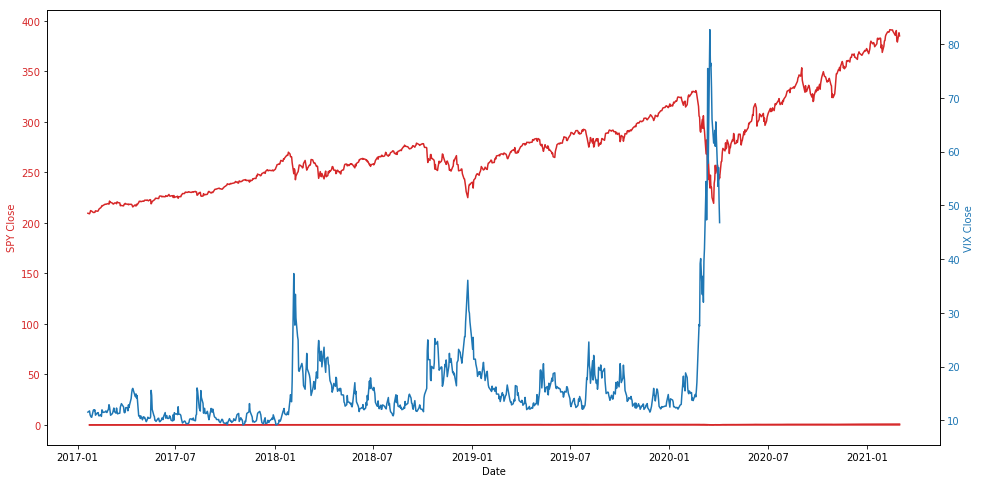

In [49]:
# Overlay Charts of SPY and VIX with a secondary y-axis
data1 = spy_data
data2 = vix_data

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('SPY Close', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('VIX Close', color=color)  # we already handled the x-label with ax1
ax2.plot(data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.gcf().set_size_inches(16, 8)
plt.show()

In [50]:
# Evaluate Correlations between SPY & VIX (Inversely Correlated)
all_data.corr()

,SPY Close,Daily Returns,Cumulative Returns,VIX Close
SPY Close,1.000000,0.039166,1.000000,0.037505
Daily Returns,0.039166,1.000000,0.039166,-0.221599
Cumulative Returns,1.000000,0.039166,1.000000,0.036479
VIX Close,0.037505,-0.221599,0.036479,1.000000


# Add New Features Options Sentiment SPX

In [51]:
# Import Option Sentiment (1M 25 Delta Puts and Calls along with Spread and Ratios)
from pathlib import Path
filepath = ("ling.csv")
spyopt_df=pd.read_csv(filepath)
spyopt_df["Date"] = pd.to_datetime(spyopt_df["Date"]).dt.strftime('%Y-%m-%d')
spyopt_df.set_index(("Date"), inplace=True)
spyopt_df.head()

,SPX 1M 25DP Vol BVOL INDEX,SPX 1M 25DC Vol BVOL INDEX,SPX 1M 100 Vol BVOL INDEX,P/C Ratio,P/C Spread,P/ATM Ratio,P/ATM Spread,ATM/C Ratio,ATM/C Spread
Date,,,,,,,,,
2006-01-30,16.6034,11.4682,13.9688,1.45,5.14,1.19,2.63,1.22,2.50
2006-03-27,16.4509,11.6610,14.0590,1.41,4.79,1.17,2.39,1.21,2.40
2006-03-30,13.6402,9.8711,11.6972,1.38,3.77,1.17,1.94,1.18,1.83
2006-05-26,14.5851,10.5401,12.5388,1.38,4.05,1.16,2.05,1.19,2.00
2006-05-31,12.1362,9.2226,10.5372,1.32,2.91,1.15,1.60,1.14,1.31


In [54]:
# Concat all Dataframes Drop Null Values and Run Correlation
all_data2 = pd.concat([all_data, spyopt_df], axis=1)
all_data2.isnull().sum()
all_data2.dropna(inplace=True)
all_data2.head()
all_data2.describe()
all_data2.corr()

,SPY Close,Daily Returns,Cumulative Returns,VIX Close,SPX 1M 25DP Vol BVOL INDEX,SPX 1M 25DC Vol BVOL INDEX,SPX 1M 100 Vol BVOL INDEX,P/C Ratio,P/C Spread,P/ATM Ratio,P/ATM Spread,ATM/C Ratio,ATM/C Spread
SPY Close,1.000000,0.039166,1.000000,0.036479,0.157979,0.138768,0.153506,0.078908,0.188915,-0.162189,0.166104,0.302967,0.197502
Daily Returns,0.039166,1.000000,0.039166,-0.221599,-0.199453,-0.198857,-0.207148,-0.035953,-0.189960,0.051732,-0.137580,-0.114318,-0.223687
Cumulative Returns,1.000000,0.039166,1.000000,0.036479,0.157979,0.138768,0.153506,0.078908,0.188915,-0.162189,0.166104,0.302967,0.197502
VIX Close,0.036479,-0.221599,0.036479,1.000000,0.892239,0.893665,0.889630,-0.074531,0.841373,-0.300210,0.815947,0.202118,0.813600
SPX 1M 25DP Vol BVOL INDEX,0.157979,-0.199453,0.157979,0.892239,1.000000,0.991527,0.997172,0.008634,0.963679,-0.300993,0.914001,0.340217,0.949589
SPX 1M 25DC Vol BVOL INDEX,0.138768,-0.198857,0.138768,0.893665,0.991527,1.000000,0.996126,-0.104040,0.920821,-0.385572,0.866285,0.244659,0.913422
SPX 1M 100 Vol BVOL INDEX,0.153506,-0.207148,0.153506,0.889630,0.997172,0.996126,1.000000,-0.042242,0.945732,-0.355243,0.880927,0.313583,0.945674
P/C Ratio,0.078908,-0.035953,0.078908,-0.074531,0.008634,-0.104040,-0.042242,1.000000,0.239817,0.802958,0.282432,0.783431,0.189136
P/C Spread,0.188915,-0.189960,0.188915,0.841373,0.963679,0.920821,0.945732,0.239817,1.000000,-0.110911,0.962985,0.518370,0.972908
P/ATM Ratio,-0.162189,0.051732,-0.162189,-0.300210,-0.300993,-0.385572,-0.355243,0.802958,-0.110911,1.000000,0.022323,0.263673,-0.218757


In [55]:
# Check to ensure NA's dropped and persisted
all_data2.isnull().sum()

SPY Close                     0
Daily Returns                 0
Cumulative Returns            0
VIX Close                     0
SPX 1M 25DP Vol BVOL INDEX    0
SPX 1M 25DC Vol BVOL INDEX    0
SPX 1M 100 Vol BVOL INDEX     0
P/C Ratio                     0
P/C Spread                    0
P/ATM Ratio                   0
P/ATM Spread                  0
ATM/C Ratio                   0
ATM/C Spread                  0
dtype: int64

In [56]:
# Key Values for Options Portion of the Data
'''
KEY
SPX 1M 25DP Vol BVOL INDEX = 1 Month 25 Delta Put Implied Volatility for SPX
SPX 1M 25DC Vol BVOL INDEX = 1 Month 25 Delta Call Implied Volatility for SPX
SPX 1M 100 Vol BVOL INDEX = 1 Month 100% Moneyness Implied Volatility for SPX
PC Ratio = Put/Call Ratio
P/C Spread = Put Call Spread 
P/ATM Ratio = Put ATM Ratio
P/ATM Spread = Put ATM Spread
ATM / C Ratio = Call ATM Ratio
ATM / C Spread = Call ATM Spread
'''
all_data2


,SPY Close,Daily Returns,Cumulative Returns,VIX Close,SPX 1M 25DP Vol BVOL INDEX,SPX 1M 25DC Vol BVOL INDEX,SPX 1M 100 Vol BVOL INDEX,P/C Ratio,P/C Spread,P/ATM Ratio,P/ATM Spread,ATM/C Ratio,ATM/C Spread
Date,,,,,,,,,,,,,
2017-01-23,209.054703,-0.002602,-0.002602,11.770000,11.4007,7.7258,8.8658,1.48,3.67,1.29,2.53,1.15,1.14
2017-01-24,210.395096,0.006412,0.003793,11.070000,11.2947,7.9025,8.9462,1.43,3.39,1.26,2.35,1.13,1.04
2017-01-25,212.216156,0.008655,0.012481,10.810000,11.1970,7.5949,8.6727,1.47,3.60,1.29,2.52,1.14,1.08
2017-01-26,211.994339,-0.001045,0.011423,10.630000,11.3364,7.7880,8.8915,1.46,3.55,1.27,2.44,1.14,1.10
2017-01-27,211.661514,-0.001570,0.009835,10.580000,10.1858,7.2431,8.0267,1.41,2.94,1.27,2.16,1.11,0.78
2017-01-30,210.348862,-0.006202,0.003572,11.880000,10.3585,7.3158,8.1904,1.42,3.04,1.26,2.17,1.12,0.87
2017-01-31,210.330368,-0.000088,0.003484,11.990000,10.6658,7.2930,8.3560,1.46,3.37,1.28,2.31,1.15,1.06
2017-02-01,210.413589,0.000396,0.003881,11.810000,10.7674,7.3577,8.4617,1.46,3.41,1.27,2.31,1.15,1.10
2017-02-02,210.552246,0.000659,0.004543,11.930000,10.4644,7.4718,8.3464,1.40,2.99,1.25,2.12,1.12,0.87


# Visualizng All Data

In [59]:
all_data2.hvplot(x='Date', y=["SPX 1M 25DP Vol BVOL INDEX", "SPX 1M 25DC Vol BVOL INDEX",
                             "SPX 1M 100 Vol BVOL INDEX","P/C Ratio"], value_label='Implied Vol')

:NdOverlay   [Variable]
   :Curve   [Date]   (Implied Vol)

In [60]:
# Adding Subplots for Presentation Purposes
all_data2.hvplot(x='Date', y=['SPX 1M 25DP Vol BVOL INDEX','SPX 1M 25DC Vol BVOL INDEX', 
                              'SPX 1M 100 Vol BVOL INDEX','SPY Close','VIX Close','P/C Ratio',
                              'P/C Spread','P/ATM Ratio','P/ATM Spread','ATM/C Ratio','ATM/C Spread'], 
                width=450, height=300, subplots=True, shared_axes=False, color="midnightblue").cols(2)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [61]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [62]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
'''
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)
'''

'\nfrom numpy.random import seed\n\nseed(1)\nfrom tensorflow import random\n\nrandom.set_seed(2)\n'

In [63]:
# Looking for missing values
all_data2.isnull().sum().sum()

0

In [64]:

def window_data(all_data2, window, feature_col_number, target_col_number):
#def window_data(df, window, all_data2.drop(columns=["SPY Close"]) , all_data2["SPY Close"]):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(all_data2) - window - 1):
        features = all_data2.iloc[i : (i + window), feature_col_number]
        target = all_data2.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

# X feature everything but SPY Closing and - 10 days lookback to train
X1 = all_data2.copy()
X1 = all_data2.drop(columns=["SPY Close"], axis=1)

X1 = X1.shift(5).values.reshape(-1,1)
#X1.dropna(axis = 1, how='all')
y1 = all_data2['SPY Close'].values.reshape(-1,1)

In [65]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 10

feature_column = 0
target_column = 0
X, y = window_data(all_data2, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")


X sample values:
[[209.05470276 210.39509583 212.21615601 211.99433899 211.66151428
  210.34886169 210.33036804 210.41358948 210.55224609 212.0035553 ]
 [210.39509583 212.21615601 211.99433899 211.66151428 210.34886169
  210.33036804 210.41358948 210.55224609 212.0035553  211.62452698]
 [212.21615601 211.99433899 211.66151428 210.34886169 210.33036804
  210.41358948 210.55224609 212.0035553  211.62452698 211.63378906]
 [211.99433899 211.66151428 210.34886169 210.33036804 210.41358948
  210.55224609 212.0035553  211.62452698 211.63378906 211.91111755]
 [211.66151428 210.34886169 210.33036804 210.41358948 210.55224609
  212.0035553  211.62452698 211.63378906 211.91111755 213.1683197 ]] 

y sample values:
[[211.62452698]
 [211.63378906]
 [211.91111755]
 [213.1683197 ]
 [214.00950623]]


In [66]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X1))
X_train = X1[: split - 1]
X_test = X1[split:]
y_train = y1[: split - 1]
y_test = y1[split:]

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X1)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y1)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [69]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[nan]]

 [[nan]]

 [[nan]]

 [[nan]]

 [[nan]]] 

X_test sample values:
[[[0.01230111]]

 [[0.01231672]]

 [[0.01183356]]

 [[0.01203452]]

 [[0.010924  ]]]


In [70]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [71]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [72]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 5)              140       
_________________________________________________________________
dropout (Dropout)            (None, 1, 5)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 5)              220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 5)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)

In [76]:
# Make some predictions
predicted = model.predict(X_test)

In [ ]:
 # Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
spy_model_px = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
spy_model_px.head()
#spy_model_px.to_csv("RealPred.csv")

In [ ]:
spy_model_px.plot()

In [69]:
all_data2.to_csv("TheData.csv")